# Project 2 - Ames Housing Data and Kaggle Challenge - Notebook 3

[DSI-US-8 Regression Challenge on Kaggle](https://www.kaggle.com/c/dsi-us-8-project-2-regression-challenge)<br>
[Data Description](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt)

---

## Contents
- [Import Libraries](#Import-Libraries)
- [Load Data](#Load-Data)

## Import Libraries

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from matplotlib.ticker import FormatStrFormatter, FuncFormatter

from joblib import dump, load

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

## Load Data

In [60]:
label_encoder = load("../models/label_encoders_for_nominal_columns.joblib")
lasso_model_best = load("../models/lasso_model_tuned.joblib")
standard_scaler = load("../models/scaler_for_train_data.joblib")

df = pd.read_csv("../datasets/train_clean.csv", dtype = {"Id":str, "PID":str})
df2 = pd.read_csv("../datasets/test_clean.csv", dtype = {"Id":str, "PID":str})
X = df2.drop(['Id', 'PID'], axis = 'columns')
y = lasso_model_best.predict(X)
df2["SalePrice"] = y

## Establish Baseline Score

In [61]:
X_test = df.drop(['Id', 'PID', "SalePrice"], axis = 'columns')
y_test = lasso_model_best.predict(X_test)

In [62]:
y_avg = df["SalePrice"].mean()
df["AvgPrices"] = y_avg
r2_score(df["SalePrice"], df["AvgPrices"])

0.0

In [63]:
r2_score(df["SalePrice"], y_test)

0.9066615682405196

In [64]:
df.drop(["AvgPrices"], axis = 1, inplace = True)

## Display Label Encodings and Plot Them

#### Display label encodings and create dictionaries to access them

In [65]:
columns_to_label_encode = ["MS SubClass",
                           "MS Zoning",
                           "Alley",
                           "Lot Shape",
                           "Land Contour",
                           "Lot Config",
                           "Land Slope",
                           "Neighborhood",
                           "Condition 1",
                           "Condition 2",
                           "Bldg Type",
                           "House Style",
                           "Roof Style",
                           "Roof Matl",
                           "Exterior 1st",
                           "Exterior 2nd",
                           "Mas Vnr Type",
                           "Foundation",
                           "Heating",
                           "Garage Type",
                           "Misc Feature",
                           "Sale Type"]

In [66]:
for i in range(0,len(label_encoder)):
    print("The label encodings for the",columns_to_label_encode[i],"column are:")
    for j in range(0,len(label_encoder[i].classes_)):
        print(j,"-",label_encoder[i].classes_[j])

The label encodings for the MS SubClass column are:
0 - 120
1 - 150
2 - 160
3 - 180
4 - 190
5 - 20
6 - 30
7 - 40
8 - 45
9 - 50
10 - 60
11 - 70
12 - 75
13 - 80
14 - 85
15 - 90
The label encodings for the MS Zoning column are:
0 - A (agr)
1 - C (all)
2 - FV
3 - I (all)
4 - RH
5 - RL
6 - RM
The label encodings for the Alley column are:
0 - Grvl
1 - NA
2 - Pave
The label encodings for the Lot Shape column are:
0 - IR1
1 - IR2
2 - IR3
3 - Reg
The label encodings for the Land Contour column are:
0 - Bnk
1 - HLS
2 - Low
3 - Lvl
The label encodings for the Lot Config column are:
0 - Corner
1 - CulDSac
2 - FR2
3 - FR3
4 - Inside
The label encodings for the Land Slope column are:
0 - Gtl
1 - Mod
2 - Sev
The label encodings for the Neighborhood column are:
0 - Blmngtn
1 - Blueste
2 - BrDale
3 - BrkSide
4 - ClearCr
5 - CollgCr
6 - Crawfor
7 - Edwards
8 - Gilbert
9 - Greens
10 - GrnHill
11 - IDOTRR
12 - Landmrk
13 - MeadowV
14 - Mitchel
15 - NAmes
16 - NPkVill
17 - NWAmes
18 - NoRidge
19 - NridgHt


In [67]:
# label_encodings_dict = {}
# for i in range(0,len(columns_to_label_encode)):
#     label_encodings_dict[columns_to_label_encode[i]] = label_encoder[i].classes_.tolist()

label_encodings_dict = {columns_to_label_encode[i]: label_encoder[i].classes_.tolist() for i in range(0,len(columns_to_label_encode))}
label_encodings_dict

{'MS SubClass': ['120',
  '150',
  '160',
  '180',
  '190',
  '20',
  '30',
  '40',
  '45',
  '50',
  '60',
  '70',
  '75',
  '80',
  '85',
  '90'],
 'MS Zoning': ['A (agr)', 'C (all)', 'FV', 'I (all)', 'RH', 'RL', 'RM'],
 'Alley': ['Grvl', 'NA', 'Pave'],
 'Lot Shape': ['IR1', 'IR2', 'IR3', 'Reg'],
 'Land Contour': ['Bnk', 'HLS', 'Low', 'Lvl'],
 'Lot Config': ['Corner', 'CulDSac', 'FR2', 'FR3', 'Inside'],
 'Land Slope': ['Gtl', 'Mod', 'Sev'],
 'Neighborhood': ['Blmngtn',
  'Blueste',
  'BrDale',
  'BrkSide',
  'ClearCr',
  'CollgCr',
  'Crawfor',
  'Edwards',
  'Gilbert',
  'Greens',
  'GrnHill',
  'IDOTRR',
  'Landmrk',
  'MeadowV',
  'Mitchel',
  'NAmes',
  'NPkVill',
  'NWAmes',
  'NoRidge',
  'NridgHt',
  'OldTown',
  'SWISU',
  'Sawyer',
  'SawyerW',
  'Somerst',
  'StoneBr',
  'Timber',
  'Veenker'],
 'Condition 1': ['Artery',
  'Feedr',
  'Norm',
  'PosA',
  'PosN',
  'RRAe',
  'RRAn',
  'RRNe',
  'RRNn'],
 'Condition 2': ['Artery',
  'Feedr',
  'Norm',
  'PosA',
  'PosN',
  'RR

In [68]:
label_encoders_dict = {columns_to_label_encode[i]: label_encoder[i] for i in range(0,len(columns_to_label_encode))}
label_encoders_dict

{'MS SubClass': LabelEncoder(),
 'MS Zoning': LabelEncoder(),
 'Alley': LabelEncoder(),
 'Lot Shape': LabelEncoder(),
 'Land Contour': LabelEncoder(),
 'Lot Config': LabelEncoder(),
 'Land Slope': LabelEncoder(),
 'Neighborhood': LabelEncoder(),
 'Condition 1': LabelEncoder(),
 'Condition 2': LabelEncoder(),
 'Bldg Type': LabelEncoder(),
 'House Style': LabelEncoder(),
 'Roof Style': LabelEncoder(),
 'Roof Matl': LabelEncoder(),
 'Exterior 1st': LabelEncoder(),
 'Exterior 2nd': LabelEncoder(),
 'Mas Vnr Type': LabelEncoder(),
 'Foundation': LabelEncoder(),
 'Heating': LabelEncoder(),
 'Garage Type': LabelEncoder(),
 'Misc Feature': LabelEncoder(),
 'Sale Type': LabelEncoder()}

#### Plot categorical features to explain their correlations in the presentation

In [69]:
coeff_series = pd.Series(lasso_model_best.coef_, index = df.columns.drop(["Id","PID","SalePrice"]))
coeff_series.sort_values()

Bedroom AbvGr             -5563.053289
Bsmt Cond                 -4267.112897
Kitchen AbvGr             -3774.693734
Bldg Type                 -3386.899849
Land Contour              -1662.336031
House Style               -1609.345833
Roof Matl                 -1534.671497
Yr Sold                   -1121.678268
Pool Combined             -1087.302382
MS Zoning                  -980.655212
Exterior Combined          -962.752051
Electrical                 -825.551243
Low Qual Fin SF            -795.939851
Sale Type                  -645.328441
Lot Shape                  -632.784376
Central Air                -504.199238
Alley                      -445.690496
Heating                    -384.131593
Fence                      -192.852381
Misc Val                   -147.824077
Bsmt Half Bath             -115.922856
Exter Cond                  -59.569524
Year Combined                 0.000000
BsmtFin Type 1                0.000000
Bsmt Full Bath                0.000000
Enclosed Porch           

Which categorical features hurt the value of a home the most in this model?
- Building type
- Land contour
- House style
- Roof material
- Zoning

Which categorical features make no difference to the value of a home in this model?
- Classification of house

In [70]:
categorical_negative_correlation_columns = ["Bldg Type","Land Contour", "House Style", "Roof Matl", "MS Zoning"]
categorical_no_correlation_columns = ["MS SubClass"]
additional_categorical_columns_to_plot = ["Neighborhood"]

In [71]:
df_unscaled = df.drop(["Id","PID","SalePrice"], axis = 1)
df_unscaled.loc[:,:] = standard_scaler.inverse_transform(df_unscaled)
df_unscaled["SalePrice"] = df["SalePrice"]
df_unscaled.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Remod/Add,Roof Style,Roof Matl,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,Functional,Garage Type,Garage Finish,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Exterior Combined,Rooms Combined,Fireplace Combined,Garage Combined,Pool Combined,Bsmt Type 2 Combined,Year Combined,Year Combined Squared,Year Remod/Add Squared,SalePrice
0,10.0,5.0,61.89827,13517.0,1.0,1.0,0.0,3.0,3.0,1.0,0.0,22.0,5.0,2.0,0.0,5.0,6.0,8.0,2005.0,1.0,0.0,1.0,289.0,3.0,2.0,1.0,3.0,3.0,1.0,6.0,533.0,192.0,725.0,1.0,4.0,1.0,4.0,725.0,754.0,8.881784e-16,0.0,0.0,2.0,1.0,3.0,1.0,3.0,7.0,1.0,2.0,2.0,0.0,44.0,0.0,-4.440892e-16,3.552714e-15,0.0,1.0,0.0,3.0,2010.0,9.0,60.0,8874.0,0.0,8550.0,8.881784e-16,0.0,3904576.0,1.524571e+13,4020025.0,130500
1,10.0,5.0,43.00000,11492.0,1.0,1.0,0.0,3.0,3.0,1.0,0.0,23.0,2.0,2.0,0.0,5.0,7.0,5.0,1997.0,1.0,0.0,1.0,132.0,3.0,2.0,2.0,4.0,3.0,1.0,6.0,637.0,276.0,913.0,1.0,4.0,1.0,4.0,913.0,1209.0,8.881784e-16,1.0,0.0,2.0,1.0,4.0,1.0,3.0,7.0,1.0,2.0,2.0,0.0,74.0,0.0,-4.440892e-16,3.552714e-15,0.0,1.0,0.0,4.0,2009.0,9.0,196.0,16976.0,3.0,10062.0,8.881784e-16,0.0,3986012.0,1.588829e+13,3988009.0,220000
2,5.0,5.0,68.00000,7922.0,1.0,1.0,3.0,3.0,3.0,4.0,0.0,15.0,2.0,2.0,0.0,2.0,5.0,7.0,2007.0,1.0,0.0,3.0,0.0,2.0,3.0,1.0,3.0,3.0,1.0,6.0,731.0,326.0,1057.0,1.0,2.0,1.0,4.0,1057.0,0.0,8.881784e-16,1.0,0.0,1.0,0.0,3.0,1.0,3.0,7.0,5.0,1.0,2.0,0.0,52.0,0.0,-4.440892e-16,3.552714e-15,0.0,1.0,0.0,1.0,2010.0,9.0,196.0,5285.0,0.0,2214.0,8.881784e-16,0.0,3814209.0,1.454819e+13,4028049.0,109000
3,10.0,5.0,73.00000,9802.0,1.0,1.0,3.0,3.0,3.0,4.0,0.0,26.0,2.0,2.0,0.0,5.0,5.0,5.0,2007.0,1.0,0.0,3.0,0.0,2.0,2.0,2.0,4.0,3.0,1.0,1.0,0.0,384.0,384.0,1.0,3.0,1.0,4.0,744.0,700.0,8.881784e-16,0.0,0.0,2.0,1.0,3.0,1.0,2.0,7.0,3.0,3.0,2.0,100.0,0.0,0.0,-4.440892e-16,3.552714e-15,0.0,1.0,0.0,4.0,2010.0,9.0,196.0,10108.0,0.0,7200.0,8.881784e-16,0.0,4026042.0,1.620901e+13,4028049.0,174000
4,9.0,5.0,82.00000,14235.0,1.0,1.0,0.0,3.0,3.0,4.0,0.0,23.0,2.0,2.0,0.0,0.0,6.0,8.0,1993.0,1.0,0.0,3.0,0.0,2.0,2.0,2.0,2.0,4.0,1.0,1.0,0.0,676.0,676.0,1.0,2.0,1.0,4.0,831.0,614.0,8.881784e-16,0.0,0.0,2.0,0.0,3.0,1.0,2.0,7.0,5.0,1.0,0.0,0.0,59.0,0.0,-4.440892e-16,3.552714e-15,0.0,1.0,0.0,3.0,2010.0,9.0,150.0,8670.0,0.0,8712.0,8.881784e-16,0.0,3718300.0,1.382575e+13,3972049.0,138500


In [79]:
df_unscaled_unencoded = df_unscaled.copy()
all_columns_to_unscale = columns_to_label_encode.copy()
all_columns_to_unscale.remove("Exterior 1st")
all_columns_to_unscale.remove("Exterior 2nd")

for i in all_columns_to_unscale:
    df_unscaled_unencoded[i] = label_encoders_dict[i].inverse_transform(df_unscaled[i].astype(int).tolist())

In [80]:
df_unscaled_unencoded.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Remod/Add,Roof Style,Roof Matl,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,Functional,Garage Type,Garage Finish,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Exterior Combined,Rooms Combined,Fireplace Combined,Garage Combined,Pool Combined,Bsmt Type 2 Combined,Year Combined,Year Combined Squared,Year Remod/Add Squared,SalePrice
0,60,RL,61.89827,13517.0,1.0,NA,IR1,Lvl,3.0,Corner,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6.0,8.0,2005.0,Gable,CompShg,BrkFace,289.0,3.0,2.0,CBlock,3.0,3.0,1.0,6.0,533.0,192.0,725.0,GasA,4.0,1.0,4.0,725.0,754.0,8.881784e-16,0.0,0.0,2.0,1.0,3.0,1.0,3.0,7.0,Attchd,2.0,2.0,0.0,44.0,0.0,-4.440892e-16,3.552714e-15,0.0,NA,0.0,3.0,2010.0,WD,60.0,8874.0,0.0,8550.0,8.881784e-16,0.0,3904576.0,1.524571e+13,4020025.0,130500
1,60,RL,43.00000,11492.0,1.0,NA,IR1,Lvl,3.0,Corner,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7.0,5.0,1997.0,Gable,CompShg,BrkFace,132.0,3.0,2.0,PConc,4.0,3.0,1.0,6.0,637.0,276.0,913.0,GasA,4.0,1.0,4.0,913.0,1209.0,8.881784e-16,1.0,0.0,2.0,1.0,4.0,1.0,3.0,7.0,Attchd,2.0,2.0,0.0,74.0,0.0,-4.440892e-16,3.552714e-15,0.0,NA,0.0,4.0,2009.0,WD,196.0,16976.0,3.0,10062.0,8.881784e-16,0.0,3986012.0,1.588829e+13,3988009.0,220000
2,20,RL,68.00000,7922.0,1.0,NA,Reg,Lvl,3.0,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5.0,7.0,2007.0,Gable,CompShg,None,0.0,2.0,3.0,CBlock,3.0,3.0,1.0,6.0,731.0,326.0,1057.0,GasA,2.0,1.0,4.0,1057.0,0.0,8.881784e-16,1.0,0.0,1.0,0.0,3.0,1.0,3.0,7.0,Detchd,1.0,2.0,0.0,52.0,0.0,-4.440892e-16,3.552714e-15,0.0,NA,0.0,1.0,2010.0,WD,196.0,5285.0,0.0,2214.0,8.881784e-16,0.0,3814209.0,1.454819e+13,4028049.0,109000
3,60,RL,73.00000,9802.0,1.0,NA,Reg,Lvl,3.0,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5.0,5.0,2007.0,Gable,CompShg,None,0.0,2.0,2.0,PConc,4.0,3.0,1.0,1.0,0.0,384.0,384.0,GasA,3.0,1.0,4.0,744.0,700.0,8.881784e-16,0.0,0.0,2.0,1.0,3.0,1.0,2.0,7.0,BuiltIn,3.0,2.0,100.0,0.0,0.0,-4.440892e-16,3.552714e-15,0.0,NA,0.0,4.0,2010.0,WD,196.0,10108.0,0.0,7200.0,8.881784e-16,0.0,4026042.0,1.620901e+13,4028049.0,174000
4,50,RL,82.00000,14235.0,1.0,NA,IR1,Lvl,3.0,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6.0,8.0,1993.0,Gable,CompShg,None,0.0,2.0,2.0,PConc,2.0,4.0,1.0,1.0,0.0,676.0,676.0,GasA,2.0,1.0,4.0,831.0,614.0,8.881784e-16,0.0,0.0,2.0,0.0,3.0,1.0,2.0,7.0,Detchd,1.0,0.0,0.0,59.0,0.0,-4.440892e-16,3.552714e-15,0.0,NA,0.0,3.0,2010.0,WD,150.0,8670.0,0.0,8712.0,8.881784e-16,0.0,3718300.0,1.382575e+13,3972049.0,138500


In [92]:
def scatter_plot_features_vs_target(df, x_columns, y_var):
    for i in x_columns:
        plt.figure(figsize = (15, 10))
        plt.scatter(df[i], df[y_var])
        plt.xticks(rotation = 90)
        plt.yticks(np.arange(0,700001,100000))
        plt.xlabel('Values of ' + str(i), fontsize = 15)
        plt.ylabel('Housing Price ($)', fontsize = 15)
        ax = plt.gca()
        ax.get_yaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))
        plt.title('Housing Prices Based on ' + str(i))
        plt.show()

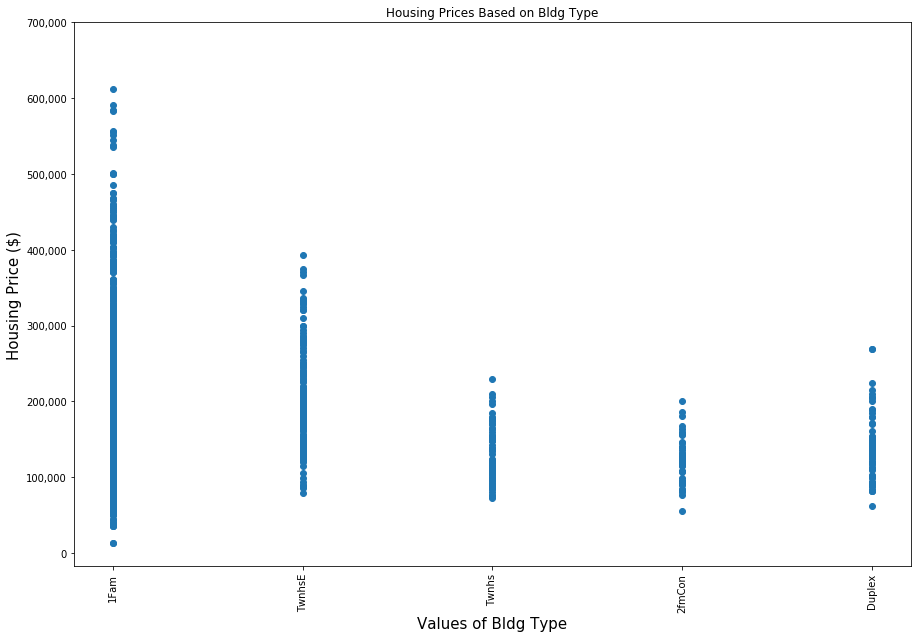

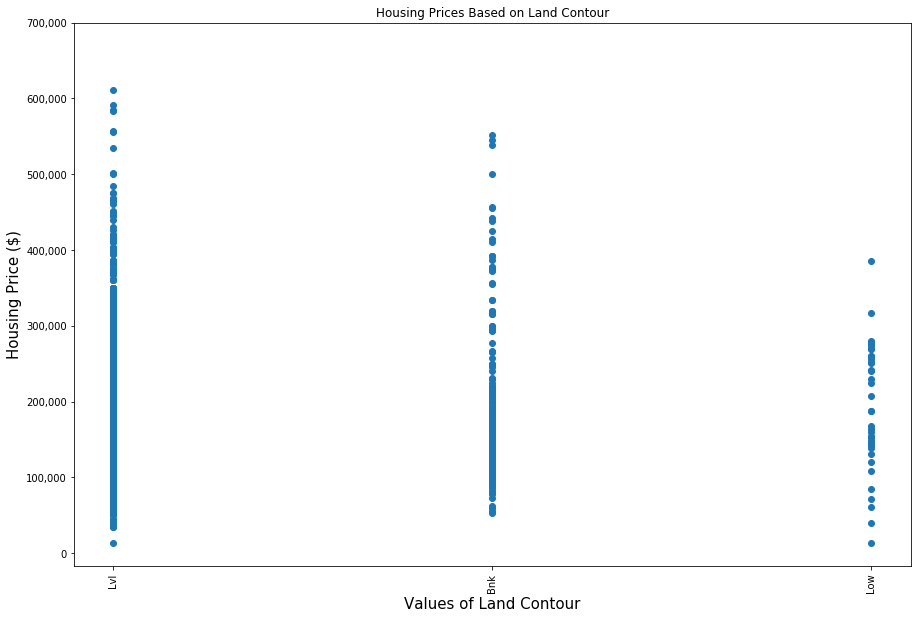

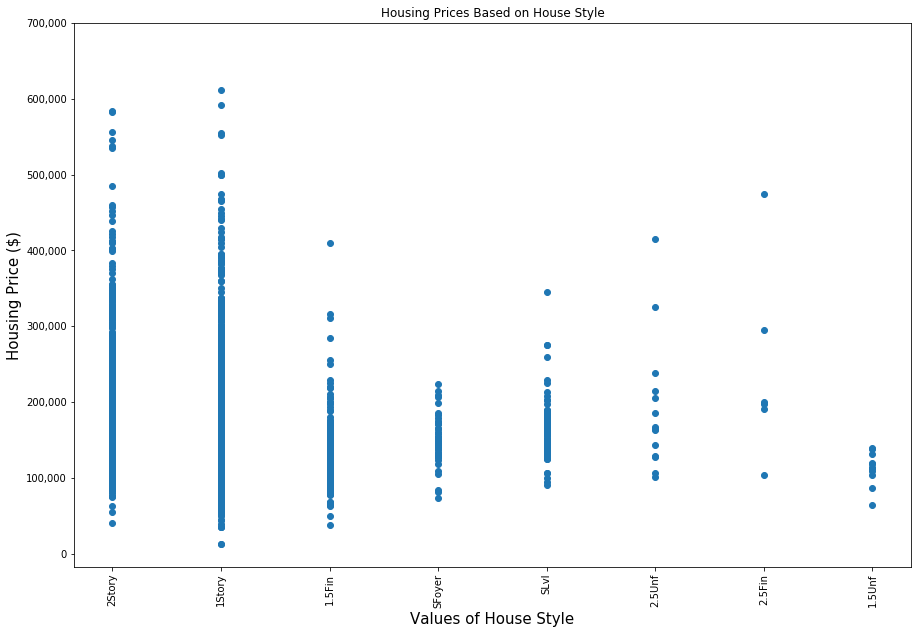

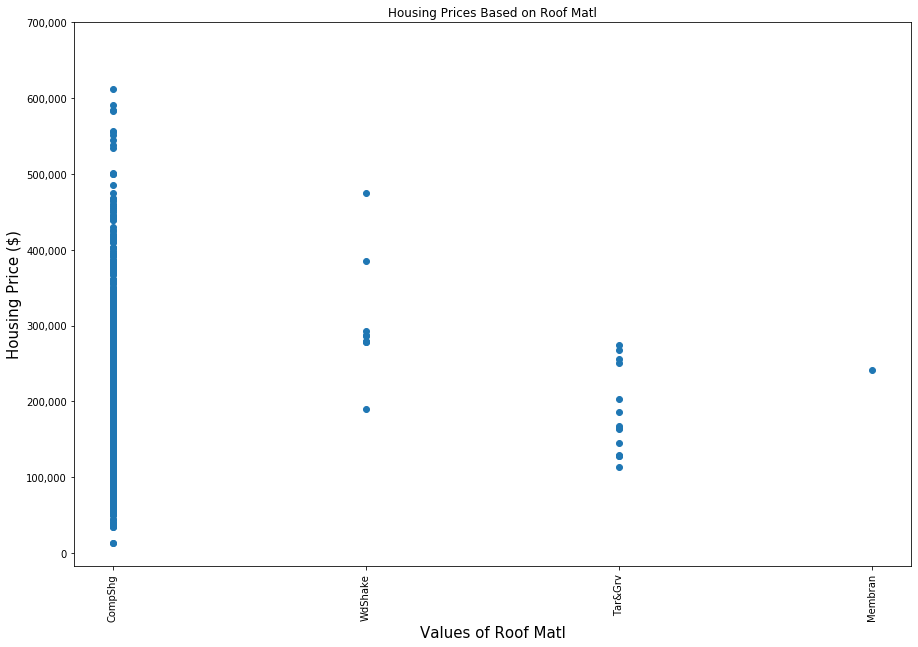

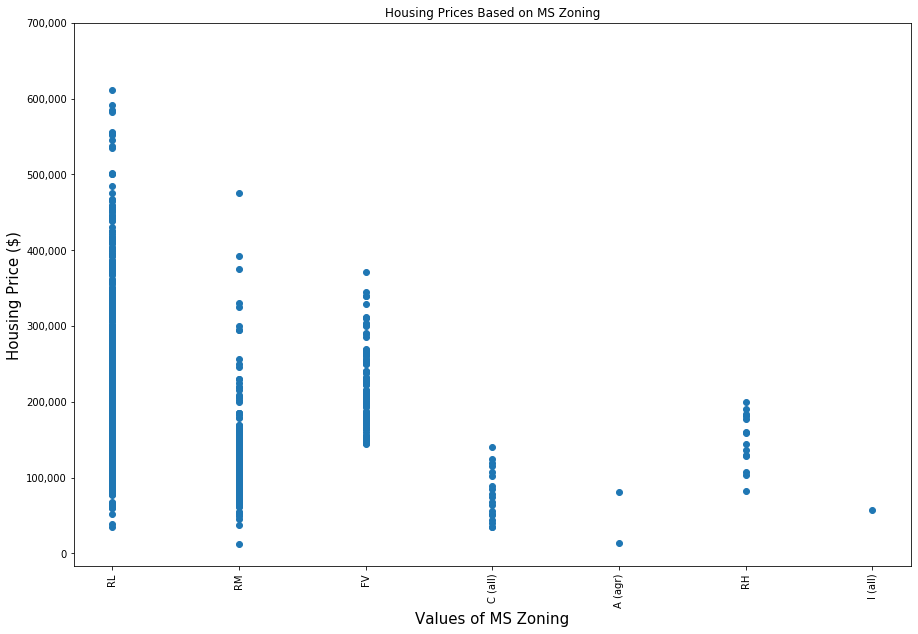

In [93]:
scatter_plot_features_vs_target(df_unscaled_unencoded, categorical_negative_correlation_columns, "SalePrice")

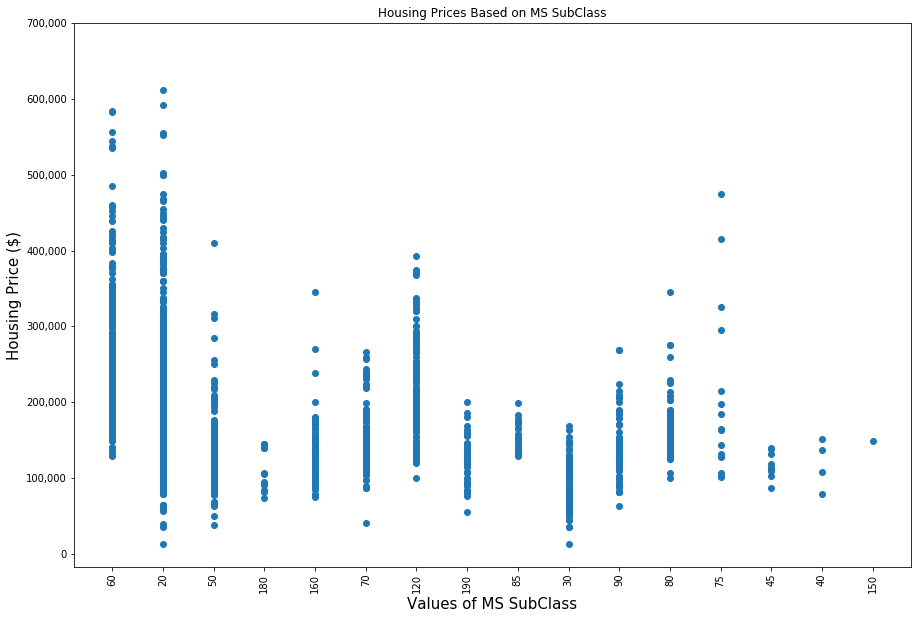

In [94]:
scatter_plot_features_vs_target(df_unscaled_unencoded, categorical_no_correlation_columns, "SalePrice")

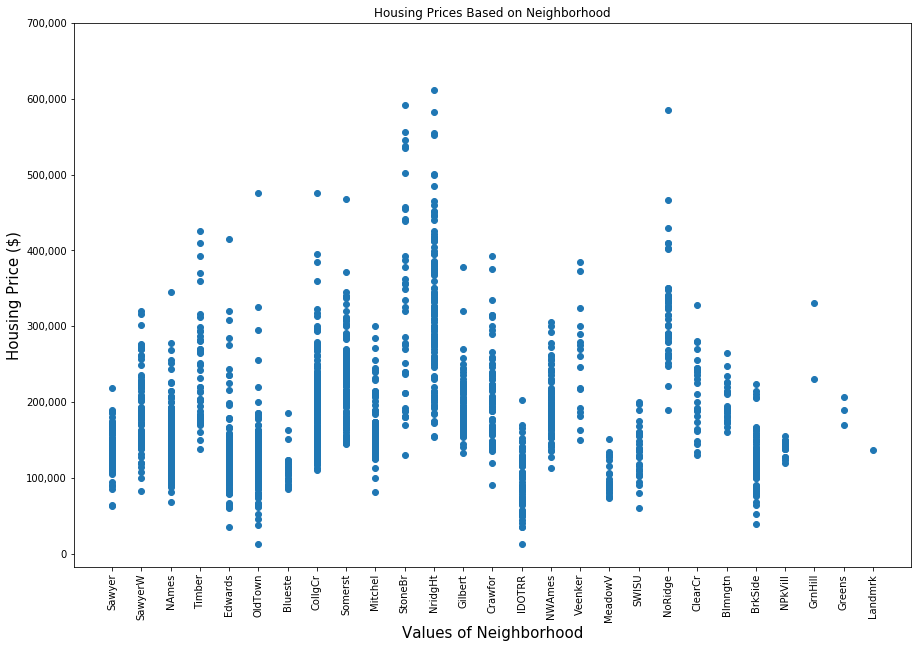

In [95]:
scatter_plot_features_vs_target(df_unscaled_unencoded, additional_categorical_columns_to_plot, "SalePrice")

In [84]:
for i in all_columns:
    print(df_unscaled_unencoded.groupby(i)['SalePrice'].mean())

Bldg Type
1Fam      185155.198937
2fmCon    123179.891304
Duplex    139296.333333
Twnhs     133100.000000
TwnhsE    198312.372671
Name: SalePrice, dtype: float64
Land Contour
Bnk    204590.672840
Low    194913.756098
Lvl    179013.814332
Name: SalePrice, dtype: float64
House Style
1.5Fin    135832.534562
1.5Unf    112466.666667
1Story    179630.764205
2.5Fin    243666.666667
2.5Unf    191785.714286
2Story    206579.951342
SFoyer    149343.920000
SLvl      166248.989362
Name: SalePrice, dtype: float64
Roof Matl
CompShg    180755.004948
Membran    241500.000000
Tar&Grv    184088.142857
WdShake    306000.000000
Name: SalePrice, dtype: float64
MS Zoning
A (agr)     47300.000000
C (all)     78010.894737
FV         218618.316832
I (all)     57625.000000
RH         148859.571429
RL         191104.170119
RM         129049.968254
Name: SalePrice, dtype: float64
MS SubClass
120    211813.613636
150    148400.000000
160    138452.215909
180    109672.727273
190    124310.326087
20     189096.9700

In [85]:
def bar_chart_features_vs_target_means(df, x_columns, y_var):
    for i in x_columns:
        x_order = []
        [x_order.append(x) for x in df[i] if x not in x_order]
        ax = df.groupby(i)['SalePrice'].mean().loc[x_order].plot(kind = "bar", legend = False, figsize = (20,10))
        plt.xlabel('Values of ' + str(i), fontsize = 15)
        plt.ylabel('Average Price ($)', fontsize = 15)
        plt.yticks(np.arange(0,300001,100000))
        ax.get_yaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))
        plt.title('Effect of ' + str(i) + ' on Price', fontsize = 25)
        plt.show()

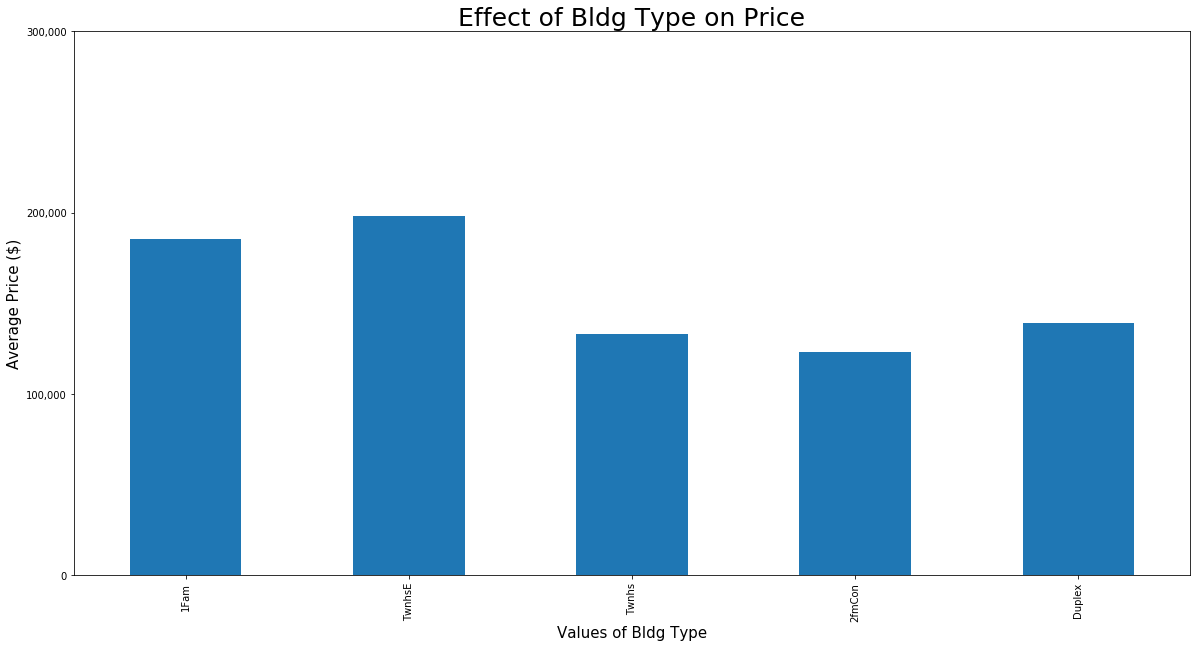

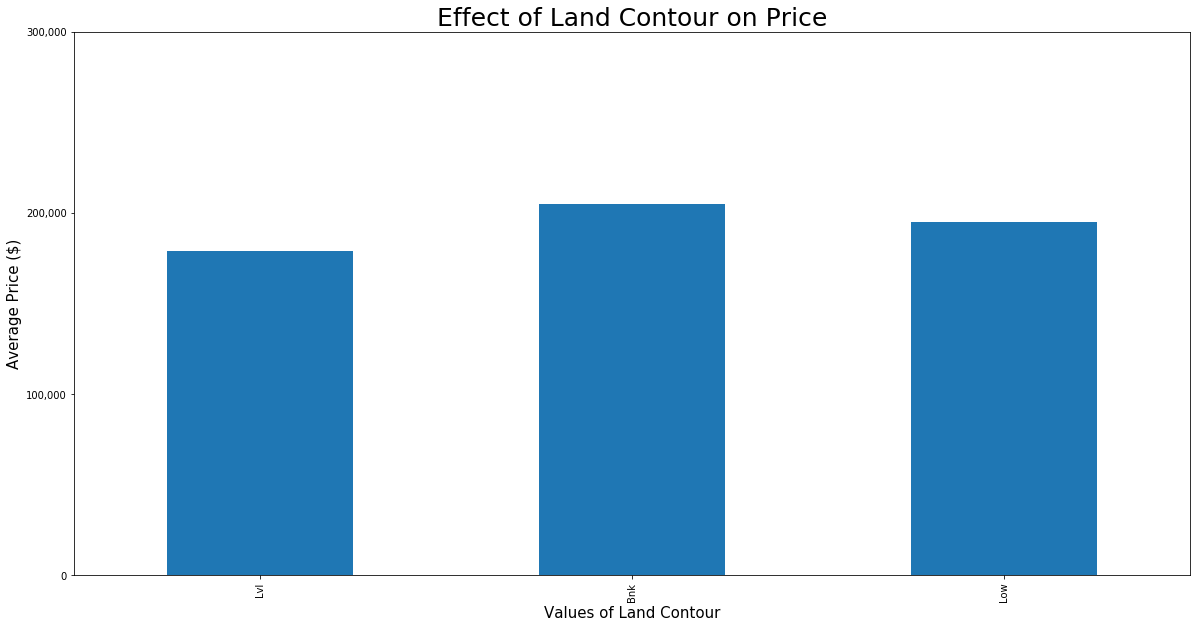

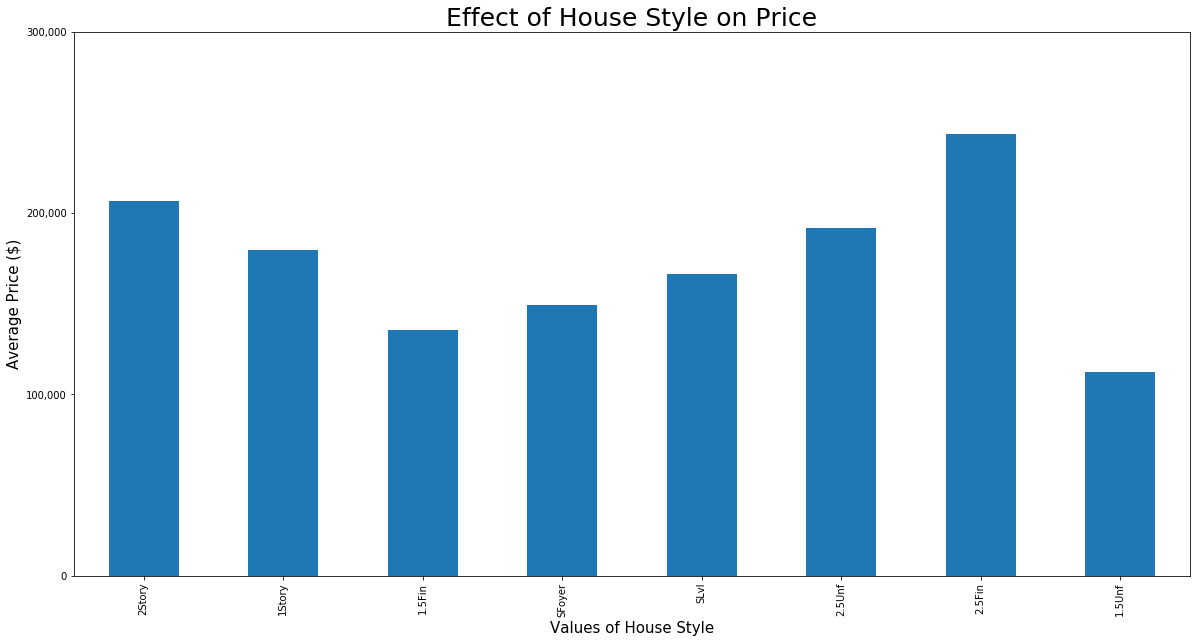

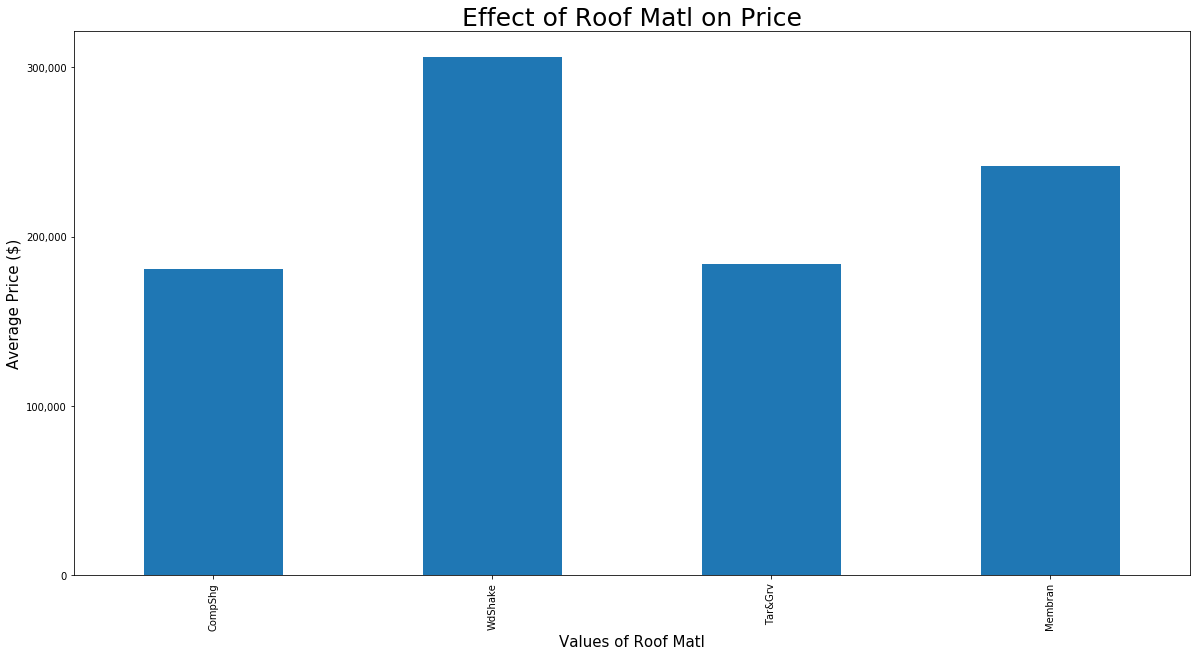

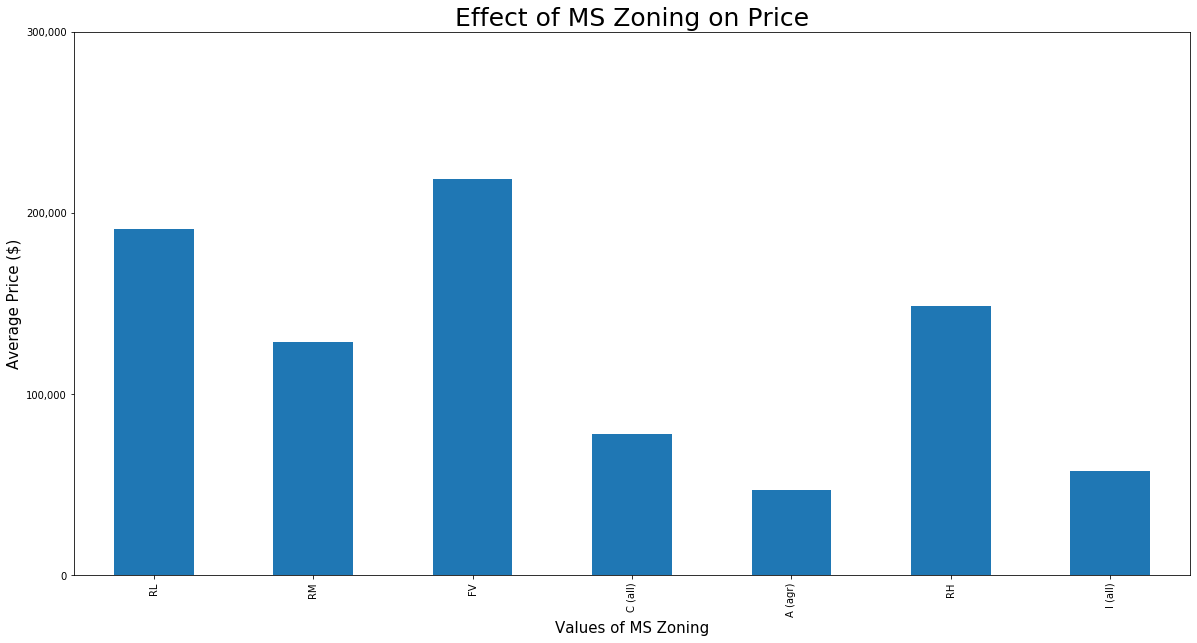

In [86]:
bar_chart_features_vs_target_means(df_unscaled_unencoded, categorical_negative_correlation_columns, "SalePrice")

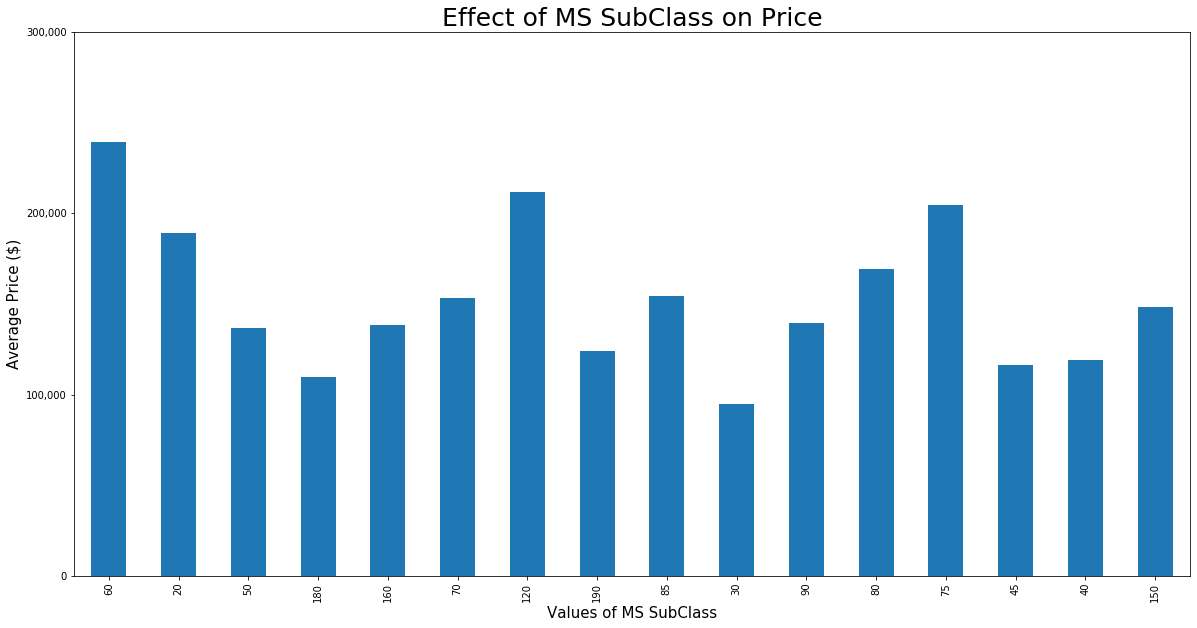

In [87]:
bar_chart_features_vs_target_means(df_unscaled_unencoded, categorical_no_correlation_columns, "SalePrice")

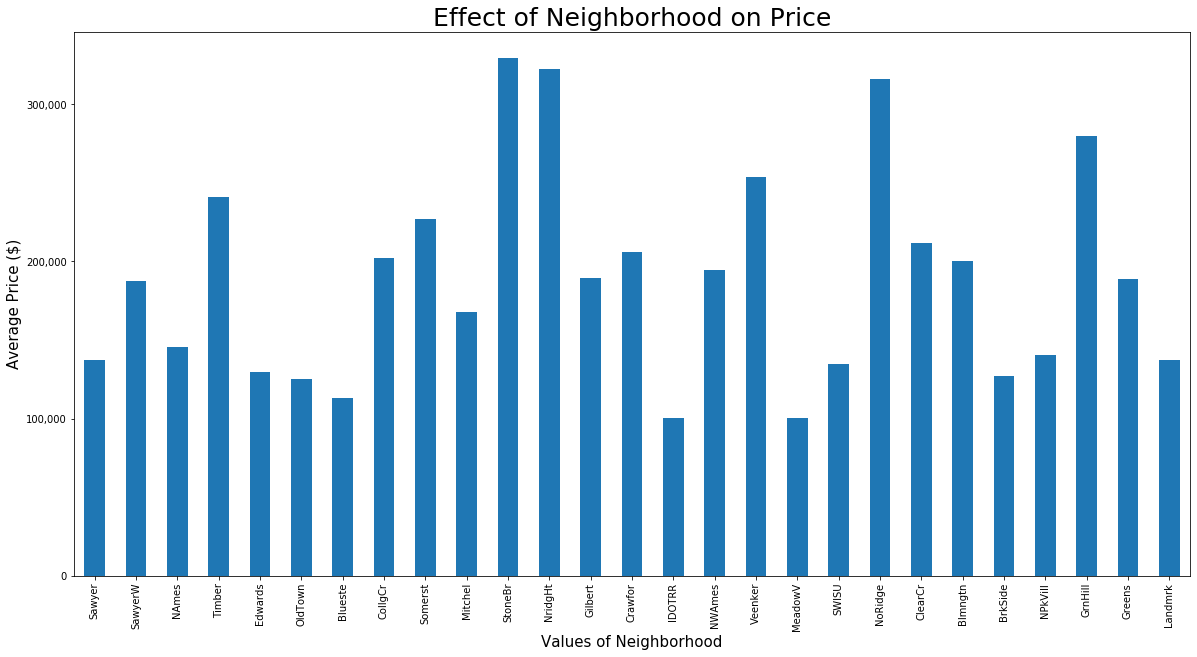

In [88]:
bar_chart_features_vs_target_means(df_unscaled_unencoded, ["Neighborhood"], "SalePrice")